In [ ]:
!pip install wandb

In [ ]:
!wandb login 4af466ac2d3f11cc39abab948459648597f363cf

wandb: Appending key for api.wandb.ai to your netrc file: /Users/student/.netrc


In [ ]:
import wandb
from wandb.keras import WandbCallback
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split

# Initialize wandb
wandb.init(project='DNS_lstm', config={
    'epochs': 1,
    'batch_size': 16,
    # Add other hyperparameters or configurations
})

wandb: Currently logged in as: shirlynjenita. Use `wandb login --relogin` to force relogin


In [ ]:
!pip install tldextract

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM


from pandas import read_csv, concat
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
import tldextract
import numpy as np
import pandas as pd

In [ ]:
legitDomains = pd.read_csv('/Users/student/Downloads/good_2mil_new.csv')
dgaDomains = pd.read_csv('/Users/student/Downloads/full_dga2mil_new.csv' )

In [ ]:
legitDomains['tld'] = [tldextract.extract(d).domain for d in legitDomains['domain']]
dgaDomains['tld'] = [tldextract.extract(d).domain for d in dgaDomains ['domain']]

legitDomains = legitDomains[-legitDomains['tld'].str.contains('\`|\.')]
dgaDomains = dgaDomains[-dgaDomains['tld'].str.contains('\`|\.')]

In [ ]:
allDomains = concat([legitDomains, dgaDomains], ignore_index=True)
allDomains = allDomains.sample(frac=1).reset_index(drop=True)

X, y = allDomains['tld'], allDomains['label']

In [ ]:
allDomains.head(20)

,domain,label,tld,type
0,tra-s4-us.best61.com,0,best61,NaN
1,avgpqv49qjgt.net,1,avgpqv49qjgt,qadars
2,gmc.freefiremobile.com,0,freefiremobile,NaN
3,gbjxwzwjwm.info,1,gbjxwzwjwm,nymaim
4,yourhome.net,1,yourhome,suppobox
5,hnbvtkdm.co,1,hnbvtkdm,proslikefan
6,m44amfj6i8p2eswk6m.biz,1,m44amfj6i8p2eswk6m,rovnix
7,ajktmjgvwf.tv,1,ajktmjgvwf,pushdotid
8,wdrqvkexnnjnypkls.me,1,wdrqvkexnnjnypkls,ranbyus
9,sugarfun.com.tw,0,sugarfun,NaN


In [ ]:
validChars = {x: idx + 1 for idx, x in enumerate(set(''.join(X))) }

maxFeatures = len(validChars) + 1
maxlen = np.max([len(x) for x in X])

In [ ]:
validChars

{'A': 1,
 'o': 2,
 'e': 3,
 'a': 4,
 '2': 5,
 'p': 6,
 'l': 7,
 'c': 8,
 'I': 9,
 'q': 10,
 '7': 11,
 '-': 12,
 'Y': 13,
 'S': 14,
 'x': 15,
 'h': 16,
 'X': 17,
 'V': 18,
 'r': 19,
 '6': 20,
 'g': 21,
 'i': 22,
 's': 23,
 'Z': 24,
 'R': 25,
 'd': 26,
 'u': 27,
 'Q': 28,
 '4': 29,
 't': 30,
 'D': 31,
 'b': 32,
 'H': 33,
 'P': 34,
 'j': 35,
 'n': 36,
 'y': 37,
 'T': 38,
 '5': 39,
 'B': 40,
 '1': 41,
 '_': 42,
 '8': 43,
 'm': 44,
 '9': 45,
 'k': 46,
 'F': 47,
 'E': 48,
 'C': 49,
 'U': 50,
 'f': 51,
 '0': 52,
 'w': 53,
 'v': 54,
 'z': 55,
 '3': 56,
 'G': 57,
 'W': 58}

In [ ]:
X = [[validChars[y] for y in x] for x in X]
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = Sequential()
model.add(Embedding(maxFeatures, 128))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop')

In [ ]:
model.fit(X_train, y_train, epochs=wandb.config.epochs, batch_size=wandb.config.batch_size,
          validation_data=(X_test, y_test), callbacks=[WandbCallback()])

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


212024/212026 [============================>.] - ETA: 0s - loss: 0.1844

/Users/student/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /Users/student/Documents/wandb/run-20231214_143002-bqn3z2ie/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/student/Documents/wandb/run-20231214_143002-bqn3z2ie/files/model-best/assets
wandb: Adding directory to artifact (/Users/student/Documents/wandb/run-20231214_143002-bqn3z2ie/files/model-best)... Done. 0.0s


212026/212026 [==============================] - 6021s 28ms/step - loss: 0.1844 - val_loss: 0.1743


In [ ]:
domain = [[validChars[ch] for ch in tldextract.extract('wikipedia.com').domain]]
domain = pad_sequences(domain, maxlen=maxlen)

model.predict(domain)

1/1 [==============================] - 0s 12ms/step


array([[0.03270486]], dtype=float32)

In [ ]:
probs = model.predict(X_test)

26504/26504 [==============================] - 262s 10ms/step


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, probs > 0.5).ravel()

print('TP: %d\nTN: %d\nFP: %d\nFN: %d\n' % (tp, tn, fp, fn))
print('FP rate: %.3f%%\nFN rate: %.3f%% \n' % (fp / (fp + tn) * 100, fn * (fn + tp) * 100))

print('Sensitivity: %.3f%%\nSpecificity: %.3f%% \nAccuracy: %.3f%%\n' % (

     tp / (tp + fn),
     tp /  (tn + fp),
     (tp + tn) / (tp + tn + fp + fn)
))
print('AUC: %.3f%%' % roc_auc_score(y_test, probs))

TP: 392136
TN: 402555
FP: 21639
FN: 31771

FP rate: 5.101%
FN rate: 1346794929700.000% 

Sensitivity: 0.925%
Specificity: 0.924% 
Accuracy: 0.937%

AUC: 0.982%


In [ ]:
test_loss = model.evaluate(X_test, y_test)

# Print the test loss
print("Test Loss:", test_loss)

26504/26504 [==============================] - 259s 10ms/step - loss: 0.1743
Test Loss: 0.17429892718791962


26504/26504 [==============================] - 259s 10ms/step


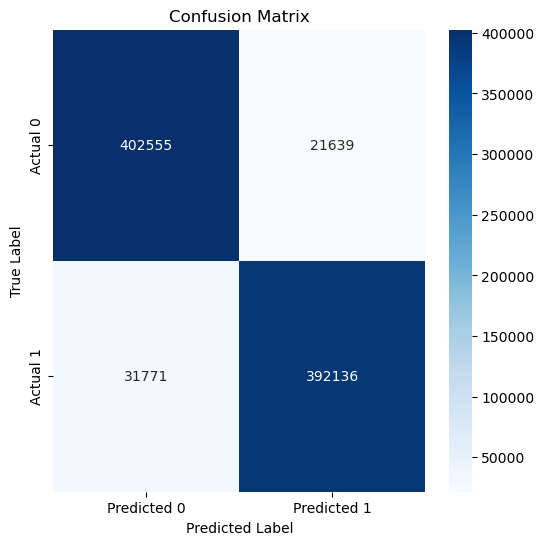

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94    424194
           1       0.95      0.93      0.94    423907

    accuracy                           0.94    848101
   macro avg       0.94      0.94      0.94    848101
weighted avg       0.94      0.94      0.94    848101



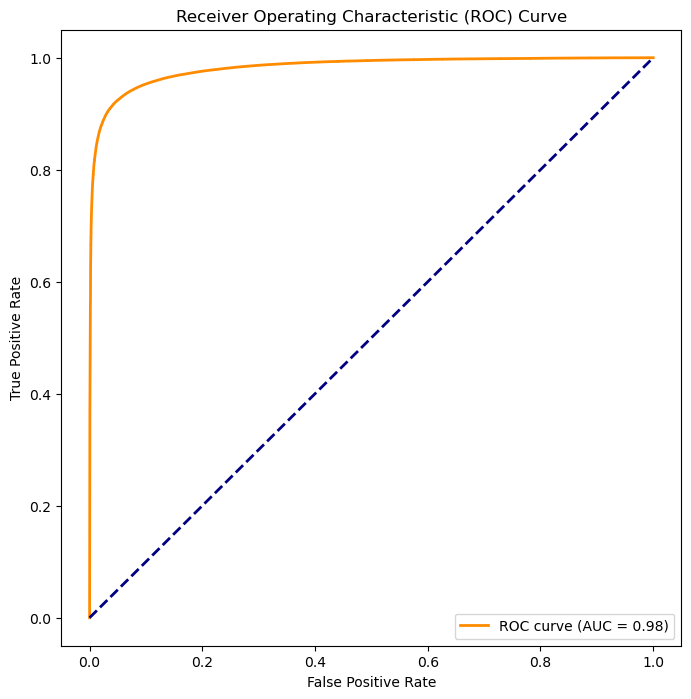

ROC-AUC Score: 0.9820992916961543


wandb: Network error (SSLError), entering retry loop.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Assuming you have a trained LSTM model named 'model'
# and your test set is 'X_test', 'y_test'

# Predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

# ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))